# Project 5 - Ford GoBike System Data


##  Introduction

> This data set includes information about individual rides made in a bike-sharing system from Ford GoBike System Data covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

In [2]:
# Read data file into dataframe
ford = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Read data frame
ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# Read
# Get the shape of our dataframe
ford.shape

(183412, 16)

In [5]:
#Read
# Gather some info our data
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [6]:
#Read
# Stats of our dataset
ford.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
#Code
# Copy to a new data frame
df = ford.copy()

In [8]:
#Test

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [9]:
# Test
# Make sure it has the same dataframe shape
df.shape

(183412, 16)

In [10]:
#Read
# Check for duplicates
df.duplicated().sum()

0

In [11]:
#Read
# Number of unique bikes
df.bike_id.nunique()

4646

In [12]:
#Read
# Number of stations
df.start_station_id.nunique()

329

In [13]:
#Read
# Check the values we have in the user type column
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [14]:
#Code
# Remove the columns that will not be of use in our analysis
df.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

In [15]:
#Read
# Check the dataframe shape after dropping the columns
df.shape

(183412, 12)

In [16]:
#Read
# Check for the info of the dataframe now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 16.8+ MB


### What is the structure of your dataset?

> Our dataset we have includes data for 4646 bikes and 329 stations. Our dataset consists of 184312 rides. Some of the variable we have are numeric such as duration, station id, bike id...etc. And other variables are objects like start time, end time, station name..etc. <br>
> There are also some missing values in some columns but most importantly in member_gender and member_birth_year columns.

### What could be of interest in our dataset?

> Timing of rides.<br>
> Ride Average time.<br>
> what are the most visited stations.<br>
> How age, gender, type of user affect the above.<br>

### Which dataset features will support the investigation?

> duration_sec, start_time, user_type, member_birth_year, member_gender, start_station_id , end_station_id and many other variables.

# Data Cleaning

In [17]:
#Code
# Change the start_time, and end_time columns into datetime type.
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [18]:
#Test
# Check if the type has changed successfully 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: datetime64[ns](2), float64(3), int64(2), object(5)
memory usage: 16.8+ MB


In [19]:
#Code
# Change the duration into minutes instead of seconds and put this in a new column duration_min
df['duration_min']=(df['duration_sec']/60).round(2)

In [20]:
#Test
# Check our new column exists
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,869.75
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No,708.68
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,1030.90
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,608.17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,26.42


In [21]:
#Code
# Drop the rows which contain missing data
df.dropna(axis=0,inplace=True)

In [22]:
#Test
# make sure all rows with missing data is now removed
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
duration_min               0
dtype: int64

In [23]:
#Code
# calculate the currecnt user's age and put it in age column
df['age']= datetime.datetime.now().year - df['member_birth_year']
df['age'].astype(int)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,869.75,36.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,1030.90,48.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,608.17,31.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,26.42,46.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,29.88,61.0


# Univariate Exploration

### Ride Average Time

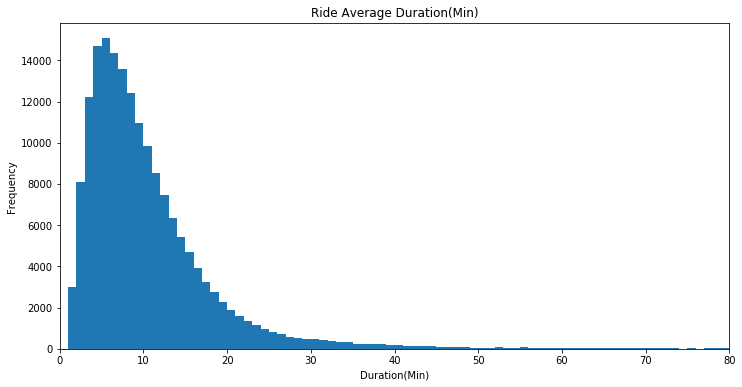

In [24]:
# plotting average duration in minutes
binsize = 1

bins = np.arange(0, df['duration_min'].max()+binsize , binsize)

plt.figure(figsize=[12, 6])
plt.hist(data = df , x = 'duration_min' , bins = bins)
plt.xlim(0,80);
plt.xlabel('Duration(Min)')
plt.ylabel('Frequency')
plt.title('Ride Average Duration(Min)');

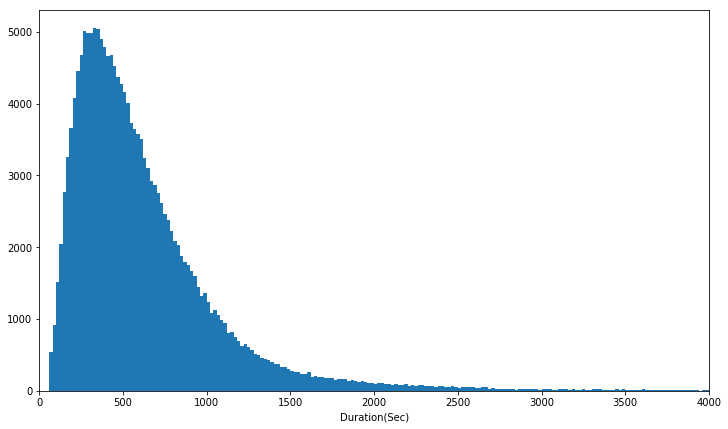

In [46]:
# plotting average duration in minutes
binsize = 20
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[12,7])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlim(0,4000);
plt.xlabel('Duration(Sec)');

From the above we can see that the average duration of the rides is around 10 minutes.

### Number of Rides/Day

In [26]:
# get the day of the week of the ride and put into day_of_week column
df['day_of_week'] = pd.DatetimeIndex(df['start_time']).weekday

In [27]:
# make sure the column is added correctly
df.day_of_week.value_counts()

3    33712
1    30584
2    28426
4    27663
0    25641
6    14512
5    14414
Name: day_of_week, dtype: int64

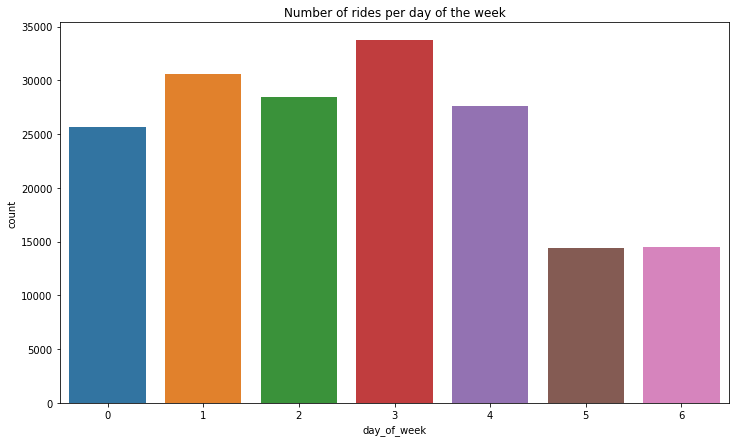

In [28]:
# let's plot the rides per day of week

plt.figure(figsize=[12, 7])
sb.countplot(data = df , x = 'day_of_week');
plt.title('Number of rides per day of the week');

From the figure above, most rides take place on Thursdays(3) and the least rides take place on Saturdays and Sundays(5,6)

### Number of Rides/Hour During The Day

In [29]:
# get the hour time of the ride and put into hour_of_day
df['hour_of_day'] = pd.DatetimeIndex(df['start_time']).hour

In [30]:
# make sure column is added correctly
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age,day_of_week,hour_of_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,869.75,36.0,3,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,1030.90,48.0,3,12


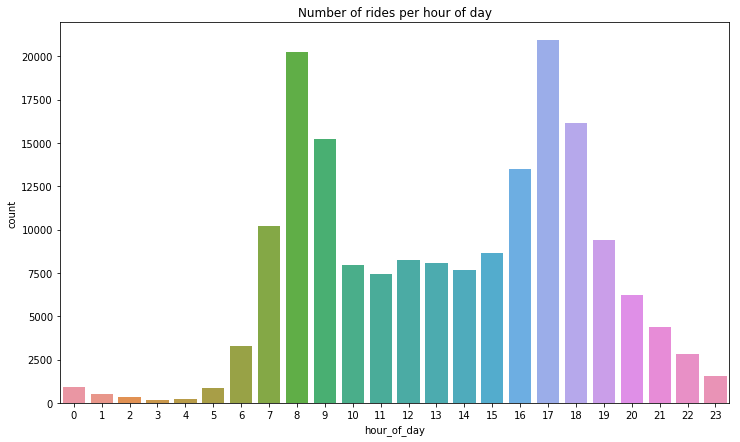

In [31]:
# plot number of rides per hours of the day
plt.figure(figsize=(12,7))
sb.countplot(data = df , x = 'hour_of_day');
plt.title('Number of rides per hour of day');

From the above figure, Most rides take place in the morning around 8am or in the evening at 5pm. However, the least rides take place at late night.

### Most Visited Stations

In [32]:
# get the top most visited stations for ride starts and save them in a variable to be plotted
top_start= df.start_station_name.value_counts()[0:10].sort_values()

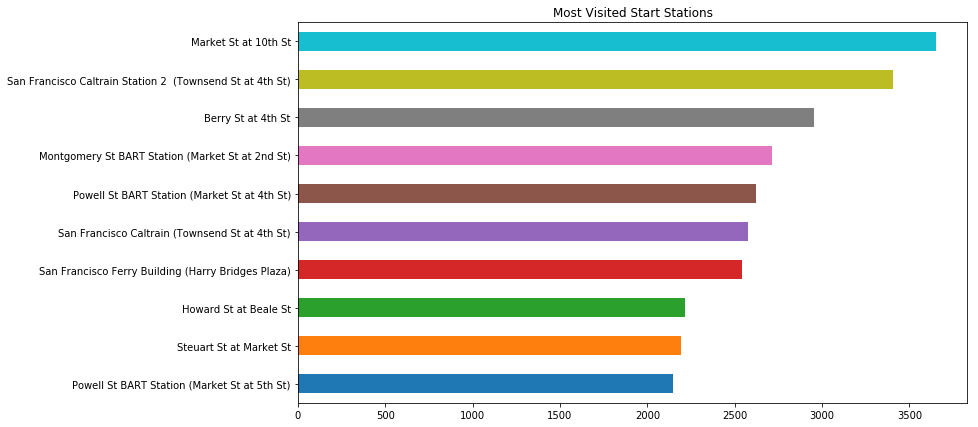

In [33]:
# plot the top most visited stations for ride starts

plt.figure(figsize =(12,7))
# plot the station names on Y axis for ease of reading
top_start.plot(kind = 'barh')
plt.title('Most Visited Start Stations');

In [34]:
# get the top most visited stations for ride ends and save them in a variable to be plotted
top_end = df.end_station_name.value_counts()[0:10].sort_values()

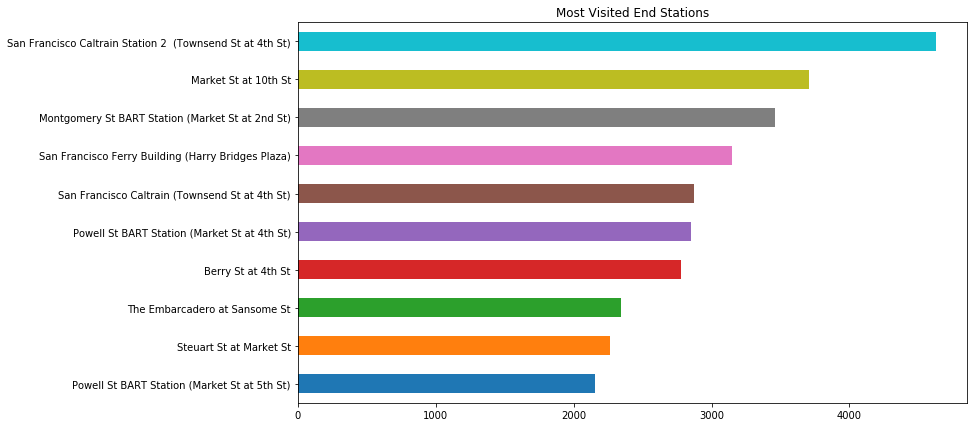

In [35]:
# plot the top most visited stations for ride ends

plt.figure(figsize =(12,7))
# plot the station names on Y axis for ease of reading
top_end.plot(kind = 'barh')
plt.title('Most Visited End Stations');

From the above figures, "Marker St at 10th st" seems to be the top most place as a start for the ride, however it is in the 2nd place as an end destination.<br>
On the other hand, "San Francisco Caltrain Station 2" is the top place as end destination, however, it is the 2nd top most as start station.

### Type of Riders

In [36]:
# get the user counts
counts = df['user_type'].value_counts()

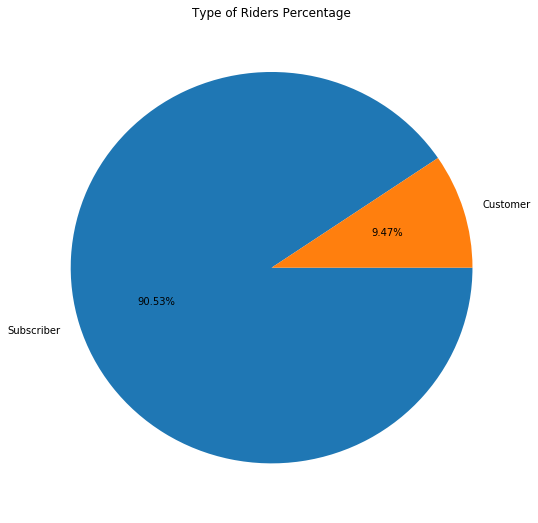

In [37]:
# plot the user counts in pie chart
plt.figure(figsize = [9,9])
plt.pie(counts, labels = counts.index, startangle = 0, counterclock = False, autopct='%.2f%%')
plt.title('Type of Riders Percentage');

From the above figure, more than 90% of the users are subscribers, accordingly, from a business point of view may be we need to focus on increasing number of customers to earn more users.

> Some data wrangling and conversion were needed. We converted the duration to minutes to investegate the data more clear and extracted the day from the data in a single column to explore its data. We also extracted the hours of the day to see the distribution of rides per hours of the day.

## Bivariate Exploration


### Gender vs Duration

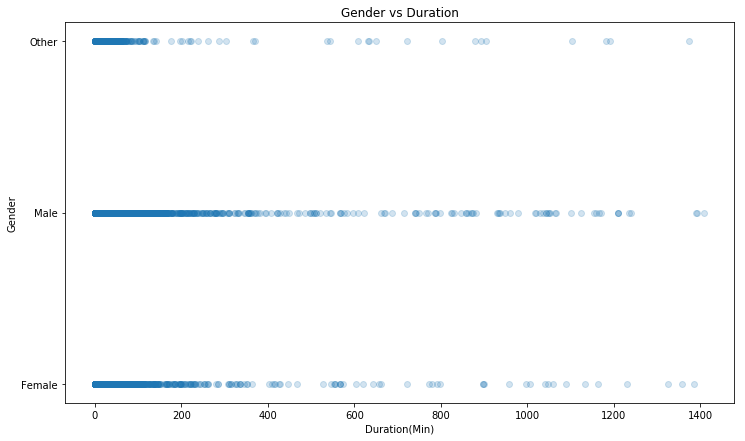

In [38]:
# plot the duration_min VS member_gender 
plt.figure(figsize = [12, 7])

plt.scatter(df['duration_min'], df['member_gender'], alpha = 0.2)
plt.title('Gender vs Duration')
plt.xlabel('Duration(Min)')
plt.ylabel('Gender');

From the above figure, we can see that males contribute more in longer rides than other genders, as they also do more rides than other genders

### Gender vs Number of Rides

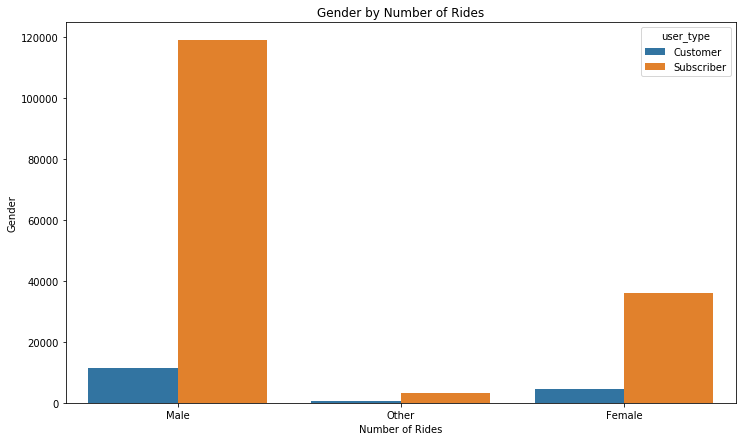

In [39]:
# plot number of rides vs gender 
plt.figure(figsize=(12,7))
sb.countplot(data = df, x = 'member_gender', hue = 'user_type');
plt.title('Gender by Number of Rides')
plt.xlabel('Number of Rides')
plt.ylabel('Gender');

We can see that male users take more rides than other genders, specially for subscribed users.

###  Number of Rides on Each Day by Gender

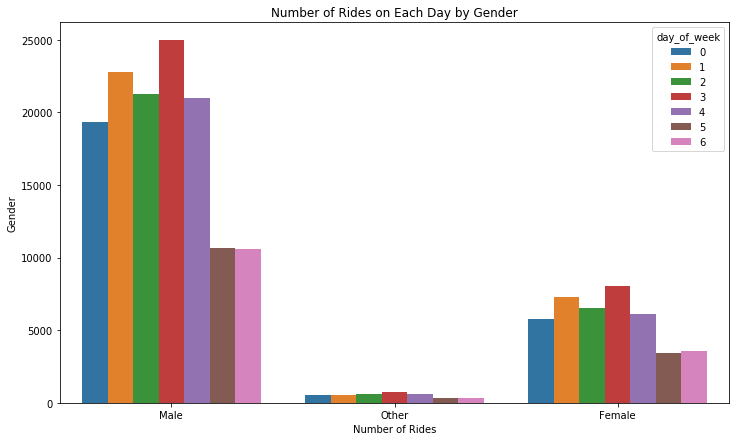

In [40]:
#plot to see if number of rides on different days depends on gender
plt.figure(figsize=(12,7))
sb.countplot(data = df, x = 'member_gender', hue = 'day_of_week');
plt.title('Number of Rides on Each Day by Gender')
plt.xlabel('Number of Rides')
plt.ylabel('Gender');

From the above we see that it's almost the same distribution for rides for both males and females per days of week. Males do higher number of rides. Thursdays have the most number of rides.

### Age Segment 

In [41]:
# adding a column of age range into our dataframe
ranges = [
    (df['age'] < 18),
    (df['age'] >= 18) & (df['age'] < 20 ),
    (df['age'] >= 20) & (df['age'] < 40 ),
    (df['age'] >= 40) ]
category = ['kids', 'teenagers', 'adults', "old"]
df['age_range'] = np.select(ranges, category, default='black')

In [42]:
# check first 3 rows to make sure
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age,day_of_week,hour_of_day,age_range
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,869.75,36.0,3,17,adults
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,1030.90,48.0,3,12,old
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,608.17,31.0,3,17,adults


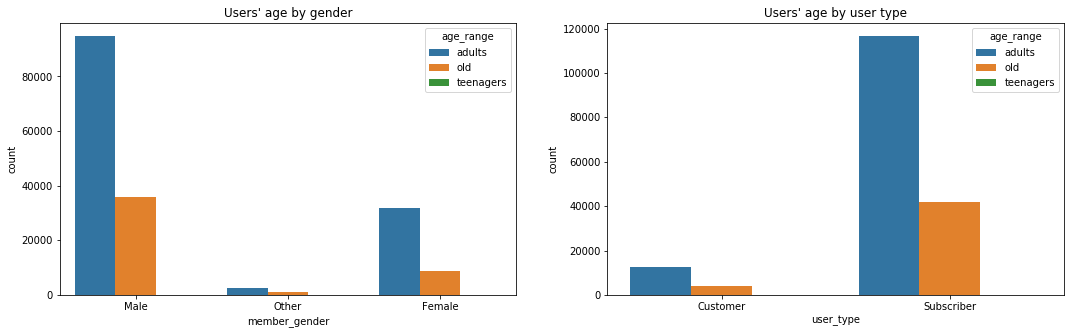

In [43]:
#see which age segment uses the system the most

# fig size for two plots
plt.figure(figsize = [18, 5]) 

# first sub-plot
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
sb.countplot(data = df, x = 'member_gender', hue = 'age_range');
plt.title("Users' age by gender");

# second sub-plot
# 1 row, 2 cols, subplot 2
plt.subplot(1, 2, 2) 
sb.countplot(data = df, x = 'user_type', hue = 'age_range');
plt.title("Users' age by user type");

From the above figures, The most rides are done by adults(20-40 years old)<br>
There is also a good number of Old users(above 40 years old)<br> 
Teenagers are not showing in the figures, this might be because of some restrictions on users's age for riding bikes.

### Relationships we observed in this part of the investigation, and how did the features of interest vary with other features in the dataset

> We found that Males do longer rides than other genders and do more rides as well.
> Adult segment do more rides and users with age range from 20 to 40 years old.
> The distribution of males and females users throughout the week doesn't differ, putting into consideration the difference in number of contributions in both genders.

### Interesting relationships between the other features (not the main feature(s) of interest)

> Male contributions of subscribed users it much higher than females', but it makes sense as the total number of male users is already much higher than females.

## Multivariate Exploration


### Ride duration VS Gender VS day of week

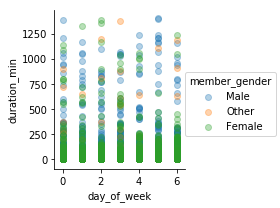

In [44]:
# plot to check how the average trip time is affected by gender and day.

g = sb.FacetGrid(data =  df, hue = 'member_gender')
g.map(plt.scatter, 'day_of_week','duration_min', alpha = 1/3)
g.add_legend()

From the above figure, we can see that Male users contribute in longer rides more than other genders. We can also see that there are more longer rides that take place on Thursdays, though i do not have segnificant explanation for this.

### Ride duration VS Gender VS Age

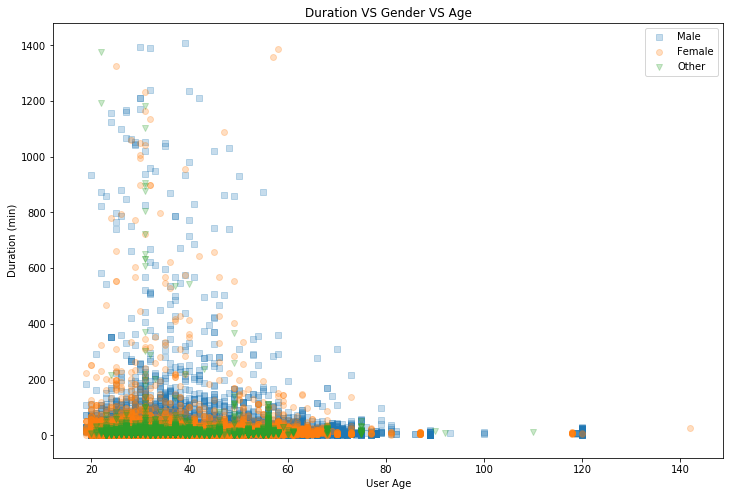

In [45]:
# plot to check how the average trip time is affected by gender and age
markers = [['Male', 's'],['Female', 'o'],['Other', 'v']]
plt.figure(figsize=(12,8));
for gender, marker in markers:
    df_gender = df[df['member_gender'] == gender]
    plt.scatter((df_gender['age']), df_gender['duration_min'], marker = marker, alpha=0.25)
plt.legend(['Male','Female','Other']);
plt.xlabel('User Age');
plt.ylabel('Duration (min)')
plt.title('Duration VS Gender VS Age');

From this figure we can see that Male users do longer rides, specially adult male users.

### Onservations:

> Although Males do highest number of trips amd duration but some women above 40 years of age contribute in long rides as well.